In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [10]:
pertamina = pd.read_csv('pandas.csv')
pertamina

,bulan,stasiun_pengisian_bahanbakar,jenis_bahanbakar,jumlah_penjualan,penerimaan_pajak
0,1,Pertamina,Bio Solar,55232675,16813838145
1,1,Pertamina,Solar,13531625,4631822667
2,1,Pertamina,Premium,148118500,46128488066
3,1,Pertamina,Pertalite,0,0
4,1,Pertamina,Pertamax,35750000,13041124794
...,...,...,...,...,...
151,12,Pertamina,Pertamax Racing,1000,2456522
152,12,Pertamina,BBG,66491,522521962
153,12,Total,Performance 92,808000,307719640
154,12,Total,Performance 95,184000,80281420


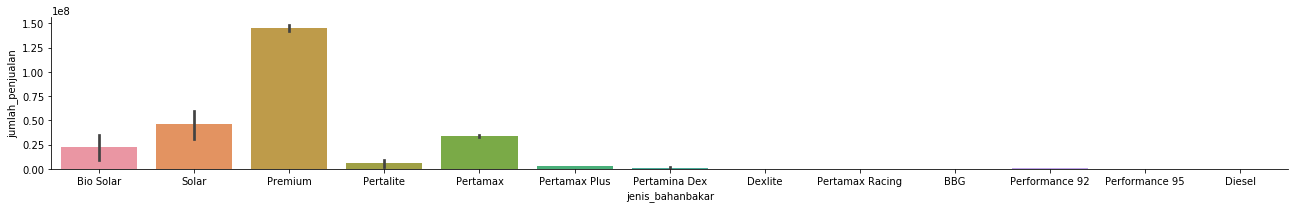

In [11]:
sns.catplot(x='jenis_bahanbakar', y='jumlah_penjualan', data=pertamina, kind='bar', height=3, aspect=6)

In [12]:
y = pertamina.iloc[:, 0]. values
x = pertamina.iloc[:, 3]. values

y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12], dtype=int64)

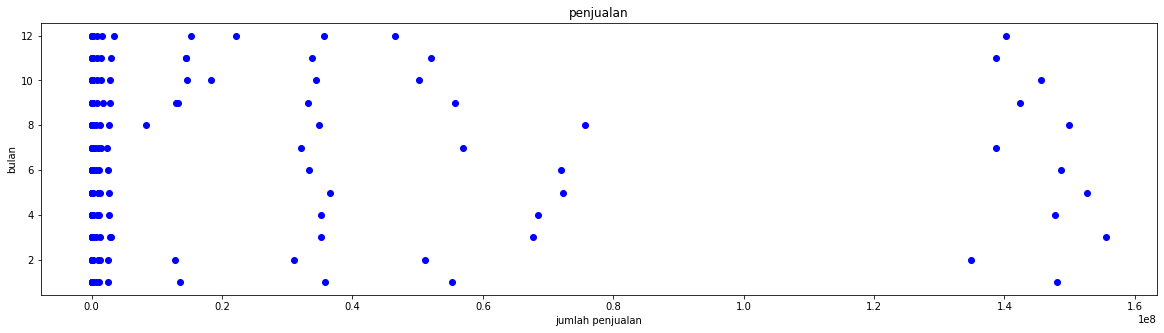

In [31]:
plt.figure(figsize=(20,5))
plt.scatter(x, y, color = 'blue')
plt.title('penjualan')
plt.xlabel('jumlah penjualan')
plt.ylabel('bulan')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 0)

In [37]:


# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)
pertamina.isnull().sum()



bulan                           0
stasiun_pengisian_bahanbakar    0
jenis_bahanbakar                0
jumlah_penjualan                0
penerimaan_pajak                0
dtype: int64

In [39]:
pertaminaFix = pertamina.dropna()
pertaminaFix

,bulan,stasiun_pengisian_bahanbakar,jenis_bahanbakar,jumlah_penjualan,penerimaan_pajak
0,1,Pertamina,Bio Solar,55232675,16813838145
1,1,Pertamina,Solar,13531625,4631822667
2,1,Pertamina,Premium,148118500,46128488066
3,1,Pertamina,Pertalite,0,0
4,1,Pertamina,Pertamax,35750000,13041124794
...,...,...,...,...,...
151,12,Pertamina,Pertamax Racing,1000,2456522
152,12,Pertamina,BBG,66491,522521962
153,12,Total,Performance 92,808000,307719640
154,12,Total,Performance 95,184000,80281420


In [43]:
pertaminaFix.isnull().sum()

bulan                           0
stasiun_pengisian_bahanbakar    0
jenis_bahanbakar                0
jumlah_penjualan                0
penerimaan_pajak                0
dtype: int64

In [44]:
msk = np.random.rand(len(pertamina)) < 0.8
train = pertamina[msk]
test = pertamina[~msk]

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['bulan']])
train_y = np.asanyarray(train[['jumlah_penjualan']])
regr.fit (train_x, train_y)
print ('koefisien :', regr.coef_)
print ('Intersep: ', regr.intercept_)

koefisien : [[-262882.67196461]]
Intersep:  [22241811.14558788]


Text(0, 0.5, 'jumlah penjualan')

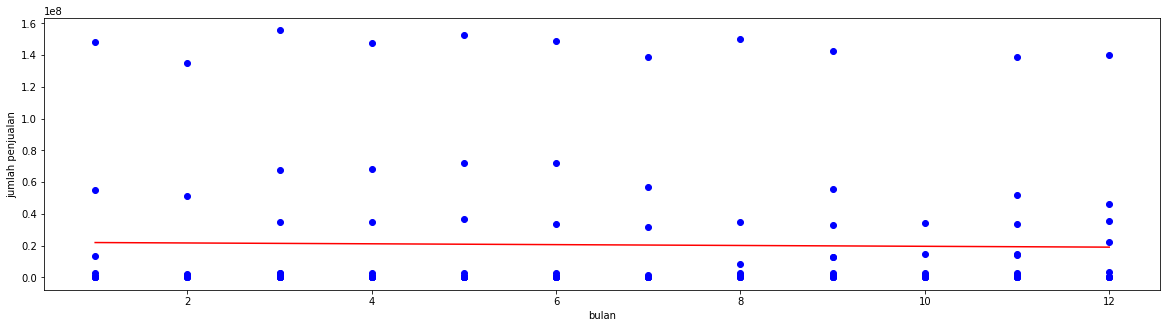

In [46]:
plt.figure(figsize=(20,5))
plt.scatter(train[['bulan']], train[['jumlah_penjualan']], color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("bulan")
plt.ylabel("jumlah penjualan")